In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
help(Sequential)

In [ ]:
help(Dense)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

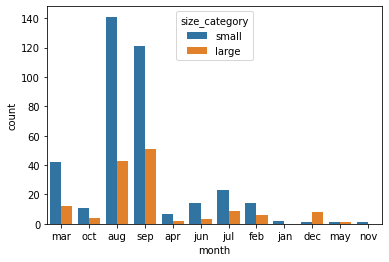

In [9]:
sns.countplot(data=df,x='month',hue='size_category');

# As fire incidents can have natural causes like extreme heat, at times there are anthropogenic causes like deliberate
# fires for shifting cultivation, land clearance etc., accidental fires due to cigerette and bonfire.
# As expected highest fire incidents are reported in the summer months of august, september and march

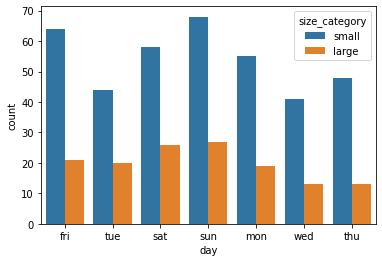

In [10]:
sns.countplot(data=df,x='day',hue='size_category');
# Also in terms of days: highest forest fires are reported on long weekends i.e friday, saturday and sunday when people happen
# to visit forest areas for recreation.

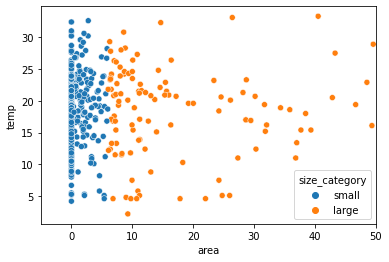

In [11]:
sns.scatterplot(data=df,y='temp',x='area',hue='size_category')
plt.xlim(-5,50);
# we have small category fire for burnt area less than 8 

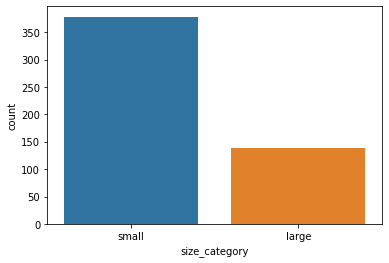

In [15]:
sns.countplot(data=df,x='size_category')

In [19]:
df.corr()['size_category'].sort_values()

monthaug        -0.058954
daythu          -0.045985
RH              -0.045243
monthjun        -0.038423
monthjan        -0.037790
monthmar        -0.035923
monthnov        -0.026695
dayfri          -0.021810
daywed          -0.021659
monthapr        -0.014001
daymon          -0.011156
ISI             -0.008726
monthoct        -0.000855
temp             0.006021
monthjul         0.007179
monthfeb         0.014090
daysun           0.016429
DC               0.019428
FFMC             0.022063
monthmay         0.032488
DMC              0.034715
daytue           0.036998
daysat           0.040397
monthsep         0.044038
rain             0.050001
wind             0.059113
monthdec         0.186140
area             0.311322
size_category    1.000000
Name: size_category, dtype: float64

In [9]:
 df['size_category'] =  df['size_category'].map({'small':0,'large':1})

In [132]:
X = df.drop(columns=['month', 'day','size_category'])
y = df['size_category']

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X_train.shape

(361, 28)

In [89]:
model = Sequential()
model.add(Dense(28,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer ='Adam' , loss='binary_crossentropy')

In [90]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=0,validation_data=(X_test,y_test))

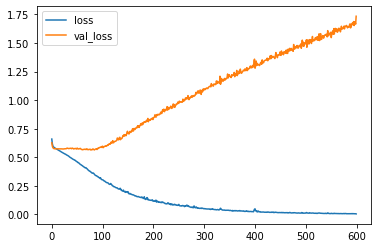

In [91]:
loss_df = pd.DataFrame({'loss':model.history.history['loss'],'val_loss':model.history.history['val_loss']})
loss_df.plot()
# Overfitting 

In [112]:
model = Sequential()
model.add(Dense(28,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer ='Adam' , loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
help(EarlyStopping)

In [113]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [114]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=0,validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 00092: early stopping


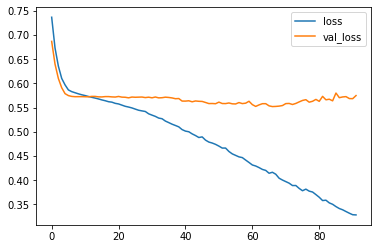

In [115]:
loss_df = pd.DataFrame({'loss':model.history.history['loss'],'val_loss':model.history.history['val_loss']})
loss_df.plot()

In [108]:
# To prevent overfitting apart from callbacks we can use dropout
from tensorflow.keras.layers import Dropout


In [109]:
model = Sequential()
model.add(Dense(28,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer ='Adam' , loss='binary_crossentropy')

In [110]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=0,validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 00111: early stopping


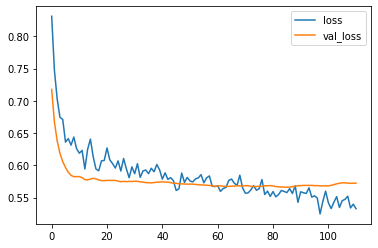

In [111]:
loss_df = pd.DataFrame({'loss':model.history.history['loss'],'val_loss':model.history.history['val_loss']})
loss_df.plot()

In [117]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       115
           1       0.76      0.32      0.45        41

    accuracy                           0.79       156
   macro avg       0.78      0.64      0.66       156
weighted avg       0.79      0.79      0.76       156



In [119]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=0,validation_data=(X_test,y_test),callbacks=[earlystop],batch_size=50,validation_split=0.25)

Epoch 00026: early stopping


In [120]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       115
           1       0.70      0.34      0.46        41

    accuracy                           0.79       156
   macro avg       0.75      0.64      0.66       156
weighted avg       0.77      0.79      0.76       156



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [150]:
# Hyperparameter Tuning

def create_model(dropout_rate,activation_function,init,neuron1,neuron2):
  model = Sequential()
  model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(4,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation = 'sigmoid'))
      
  model.compile(loss = 'binary_crossentropy',optimizer = 'Adam')
  return model

# Define the grid search parameters

batch_size = [10,20,40]
dropout_rate = [0.1,0.3]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [8,12,16]

# Create the model
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Make a dictionary of the grid search parameters

param_grids = dict (batch_size = batch_size,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,
                   validation_data=(X_test,y_test),callbacks=[earlystop])

# Build and fit the GridSearchCV

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 1,cv=4)

results = grid.fit(X_train,y_train)

**THANK YOU!**